# Usage Of Reference Data Module 
This notebook demonstrates the usage of Worldcereal Reference data module APIs

The project website: https://esa-worldcereal.org/en

The Worlcereal Reference Data Module website: https://ewoc-rdm-ui.iiasa.ac.at/

The complete documentation of reference data APIs can be found as swagger publish here - https://ewoc-rdm-api.iiasa.ac.at/swagger/index.html


1. Initialize Imports for Python scripts.
2. Get All Public Collections.
3. Get Features from a given collection (first collection in list).
4. Search Collections with Bounding Box, Ewoc Codes, Irrigation Types, Confidence scores and Validity Time.
5. Search for Feature Items with Bounding Box, Land Cover Types, Crop Types, Irrigation Types and Validity Time.
6. Get Metadata of Collection.

# 1. Initialize Imports for Python scripts

In [1]:
##################Declarations#############################
import requests
import random

from ipyleaflet import (Map, GeoData, basemaps, WidgetControl, GeoJSON,
 LayersControl, Icon, Marker,basemap_to_tiles, Choropleth,
 MarkerCluster, Heatmap,SearchControl, 
 FullScreenControl, Popup, DrawControl, Rectangle) 

def random_color(feature):    
    return {
        'color': 'black',
        'fillColor': random.choice(['red', 'yellow', 'green', 'orange']),
    }

apiUrl = 'https://ewoc-rdm-api.iiasa.ac.at'

# 2. Get All Public Collections
The Get Collection API supports pagination, it has query parameters SkipCount and MaxResultCount, which can be used to get data from API in paginated way.

In [11]:
import requests
collectionResponse = requests.get(f'{apiUrl}/collections?SkipCount=0&MaxResultCount=10')
res = collectionResponse.json()

total = res['totalCount']
items = res['items']

print(f'Total Public Collections: {total}')
print(f'Current Response Collection Count: {len(items)}')

accumulatedCount = len(items)

while(accumulatedCount < total):
 reqUrl = f'{apiUrl}/collections?SkipCount={accumulatedCount}&MaxResultCount=10'
 collectionResponse = requests.get(reqUrl)
 res2 = collectionResponse.json()
 total = res2['totalCount']
 items += res2['items']
 accumulatedCount = accumulatedCount + len(res2['items'])
 print(f'Accumulated Collections Count: {accumulatedCount}')

items[0:5]

Total Public Collections: 97
Current Response Collection Count: 10
Accumulated Collections Count: 20
Accumulated Collections Count: 30
Accumulated Collections Count: 40
Accumulated Collections Count: 50
Accumulated Collections Count: 60
Accumulated Collections Count: 70
Accumulated Collections Count: 80
Accumulated Collections Count: 90
Accumulated Collections Count: 97


[{'collectionId': '2017afoneacrefundmelpoint110',
  'title': 'MEL agronomic survey eastern Africa, 2017',
  'featureCount': 3373,
  'type': 'Point',
  'accessType': 'Public',
  'typeOfObservationMethod': 'Unknown',
  'confidenceLandCover': 0,
  'confidenceCropType': 0,
  'confidenceIrrigationType': 0,
  'ewocCodes': [1000000000, 1101060000],
  'irrTypes': [0],
  'extent': {'spatial': {'bbox': [[34.05331037027546,
      -1.118192880866231,
      35.39540334981372,
      1.14123478203019]],
    'crs': 'http://www.opengis.net/def/crs/OGC/1.3/CRS84'},
   'temporal': {'interval': [['2017-08-01T00:00:00', '2017-08-01T00:00:00']],
    'trs': 'http://www.opengis.net/def/uom/ISO-8601/0/Gregorian'}},
  'additionalData': '',
  'crs': ['http://www.opengis.net/def/crs/EPSG/0/4326'],
  'lastModificationTime': '2024-08-06T08:43:18.391259',
  'lastModifierId': '9c8e4c9b-1bb3-47da-8712-2c6db64ad892',
  'creationTime': '2024-06-26T10:13:48.646894',
  'creatorId': None,
  'id': '3a136636-5dbd-301f-abb9-5

# 3. Get ALL Features from a given collection
The Get Features API supports pagination, it has query parameters SkipCount and MaxResultCount, which can be used to get data from API in paginated way.

In [10]:
collectionId = collectionResponse.json()['items'][0]['collectionId']

itemUrl = f'{apiUrl}/collections/{collectionId}/items?SkipCount=0&MaxResultCount=50'

itemsResponse = requests.get(itemUrl)
res = itemsResponse.json()

print(f'CollectionId={collectionId}')
print(f'Total Number of Features in Collection:{res['NumberMatched']}')
print(f'Number Returned:{res['NumberReturned']}')
print(f'SkipCount:{res['SkipCount']}')

total = res['NumberMatched']
accumulatedItemsCount = res['NumberReturned']
features = res['features']

# use SkipCount and MaxResultCount to paginate and get all the features in the collection
while(accumulatedItemsCount < total):
 reqUrl =  f'{apiUrl}/collections/{collectionId}/items?SkipCount={accumulatedItemsCount}&MaxResultCount=50'
 itemsSkipResponse = requests.get(reqUrl)
 res2 = itemsSkipResponse.json()
 features += res2['features']
 accumulatedItemsCount = accumulatedItemsCount + len(res2['features'])
 print(f'accumulatedItemsCount: {accumulatedItemsCount}')
 if(accumulatedItemsCount > 100):
    break

features[0:5]

CollectionId=2021ugacopernicusgeoglamlrpoint111
Total Number of Features in Collection:6811
Number Returned:50
SkipCount:0
accumulatedItemsCount: 100
accumulatedItemsCount: 150


[{'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [32.8251837, 3.0541268]},
  'properties': {'sample_id': '2021_UGA_COPERNICUS-GEOGLAM-LR_POINT_111_42',
   'ewoc_code': 1105010010,
   'irrigation_status': 71,
   'valid_time': '2021-07-10',
   'extract': 1,
   'quality_score_lc': 71,
   'quality_score_ct': 71,
   'h3_l3_cell': '836aedfffffffff'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [32.2636837, 3.038178]},
  'properties': {'sample_id': '2021_UGA_COPERNICUS-GEOGLAM-LR_POINT_111_29',
   'ewoc_code': 1101080000,
   'irrigation_status': 71,
   'valid_time': '2021-06-13',
   'extract': 1,
   'quality_score_lc': 71,
   'quality_score_ct': 71,
   'h3_l3_cell': '836ae8fffffffff'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [31.0282404, 3.6082387]},
  'properties': {'sample_id': '2021_UGA_COPERNICUS-GEOGLAM-LR_POINT_111_4',
   'ewoc_code': 1000000000,
   'irrigation_status': 71,
   'valid_time': '2021-06-13',
   'extrac

# 4. Search Collections with Bounding Box, Validity Time and other parameters
The data APIs provide a way to search for collections with filter parameters. Refer the swagger documentation for filter details.
The below script demonstrates how we can call the REST APIs to search for the collections.

## Search Bounding Box

In [12]:
center=[-1.18,34.54]
zoom=4
m1=Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=zoom)
#-6.926427,28.696289,4.434044,40.605469
aoi = Rectangle(bounds=[[ -6.926427,28.696289], [ 4.434044,40.605469]], color="tomato", weight=2) 

#add layers
m1.add_layer(aoi)

# display map
m1

Map(center=[-1.18, 34.54], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

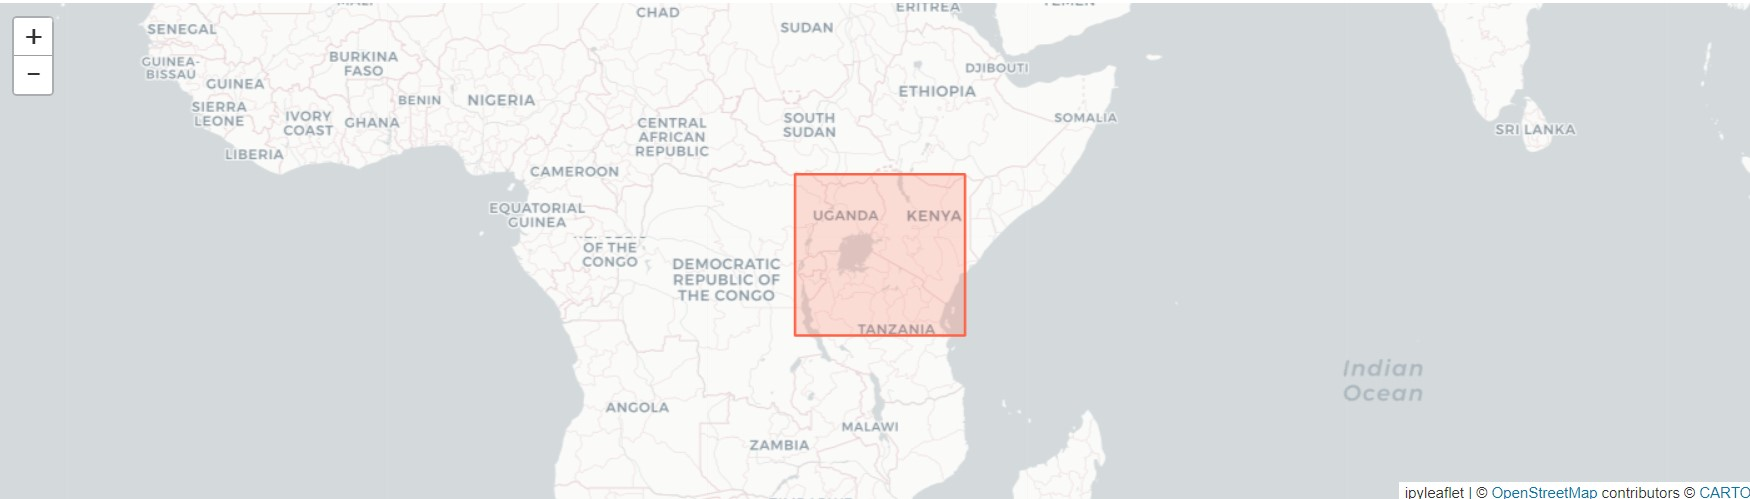

In [13]:
from IPython.display import Image
Image(filename='searchBox.jpg') 

In [14]:
import requests

# Parameters
bbox='&Bbox=28.696289&Bbox=-6.926427&Bbox=40.605469&Bbox=4.434044' #bbox: minimum longitude, minimum latitude, maximum longitude and maximum latitude 
valTime='ValidityTime.Start=2019-01-01T00%3A00%3A00Z&ValidityTime.End=2021-12-30T00%3A00%3A00Z' # date time in yyyy-MM-ddTHH:mm:ssZ format with url escaped
ewocCodes='&EwocTypes=1201020020&EwocTypes=1101080000&EwocTypes=1201000000&EwocTypes=1107000040&EwocTypes=1103030000&EwocTypes=1103110070&EwocTypes=1201030040&EwocTypes=1105010010&EwocTypes=1103010010&EwocTypes=4300000000&EwocTypes=7000000000&EwocTypes=1101060000&EwocTypes=1103060000&EwocTypes=1103020050&EwocTypes=1106000020&EwocTypes=1000000000&EwocTypes=1201010000&EwocTypes=1103090040&EwocTypes=1103000000&EwocTypes=1300000000&EwocTypes=1101070030&EwocTypes=1111010100&EwocTypes=1107000020&EwocTypes=2000000000&EwocTypes=1107000010&EwocTypes=1103010020'
# wheat, winter wheat and spring wheat
irrTypes='&IrrigationTypes=0'
# crop confidence of 60 to 99
cropConfidence='&CropTypeConfidence.Start=60&CropTypeConfidence.End=99'

colSearchUrl=f'{apiUrl}/collections/search?SkipCount=0&MaxResultCount=100&{bbox}&{valTime}{ewocCodes}{irrTypes}{cropConfidence}'
#https://ewoc-rdm-api.iiasa.ac.at/collections/search?MaxResultCount=100&&Bbox=28.696289&Bbox=-6.926427&Bbox=40.605469&Bbox=4.434044&?ValidityTime.Start=2019-01-01T00%3A00%3A00Z&ValidityTime.End=2021-12-30T00%3A00%3A00Z&CropTypes=1201020020&CropTypes=1101080000&CropTypes=1201000000&CropTypes=1107000040&CropTypes=1103030000&CropTypes=1103110070&CropTypes=1201030040&CropTypes=1105010010&CropTypes=1103010010&CropTypes=4300000000&CropTypes=7000000000&CropTypes=1101060000&CropTypes=1103060000&CropTypes=1103020050&CropTypes=1106000020&CropTypes=1000000000&CropTypes=1201010000&CropTypes=1103090040&CropTypes=1103000000&CropTypes=1300000000&CropTypes=1101070030&CropTypes=1111010100&CropTypes=1107000020&CropTypes=2000000000&CropTypes=1107000010&CropTypes=1103010020&irrTypes=0&CropTypeConfidence.Start=60&CropTypeConfidence.End=99
print(colSearchUrl)
colSearchResponse = requests.get(colSearchUrl)
cols = colSearchResponse.json()
print(len(cols))
colSearchResponse.json()

https://ewoc-rdm-api.iiasa.ac.at/collections/search?SkipCount=0&MaxResultCount=100&&Bbox=28.696289&Bbox=-6.926427&Bbox=40.605469&Bbox=4.434044&ValidityTime.Start=2019-01-01T00%3A00%3A00Z&ValidityTime.End=2021-12-30T00%3A00%3A00Z&EwocTypes=1201020020&EwocTypes=1101080000&EwocTypes=1201000000&EwocTypes=1107000040&EwocTypes=1103030000&EwocTypes=1103110070&EwocTypes=1201030040&EwocTypes=1105010010&EwocTypes=1103010010&EwocTypes=4300000000&EwocTypes=7000000000&EwocTypes=1101060000&EwocTypes=1103060000&EwocTypes=1103020050&EwocTypes=1106000020&EwocTypes=1000000000&EwocTypes=1201010000&EwocTypes=1103090040&EwocTypes=1103000000&EwocTypes=1300000000&EwocTypes=1101070030&EwocTypes=1111010100&EwocTypes=1107000020&EwocTypes=2000000000&EwocTypes=1107000010&EwocTypes=1103010020&IrrigationTypes=0&CropTypeConfidence.Start=60&CropTypeConfidence.End=99
10


[{'collectionId': '2019afnhicropharvestpoly100',
  'title': 'Rapid response crop maps Kenya, Mali and Togo (2019) by NASA Harvest',
  'featureCount': 3846,
  'type': 'Polygon',
  'accessType': 'Public',
  'typeOfObservationMethod': 'Unknown',
  'confidenceLandCover': 0,
  'confidenceCropType': 89,
  'confidenceIrrigationType': 0,
  'ewocCodes': [1000000000, 1600000000],
  'irrTypes': [0],
  'extent': {'spatial': {'bbox': [[-7.505459141380701,
      -0.062508704213765,
      34.88243885389093,
      12.41620026942137]],
    'crs': 'http://www.opengis.net/def/crs/OGC/1.3/CRS84'},
   'temporal': {'interval': [['2019-08-01T00:00:00', '2019-09-01T00:00:00']],
    'trs': 'http://www.opengis.net/def/uom/ISO-8601/0/Gregorian'}},
  'additionalData': '',
  'crs': ['http://www.opengis.net/def/crs/EPSG/0/4326'],
  'lastModificationTime': '2024-08-08T13:09:07.877871',
  'lastModifierId': None,
  'creationTime': '2024-06-26T10:17:34.739508',
  'creatorId': None,
  'id': '3a136639-d113-d738-b5f1-26bd

Display results on map

In [15]:
center=[-1.18,34.54]
zoom=4
m2=Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=zoom)

cols = colSearchResponse.json()
print(len(cols))

for col in cols:
  colbbox = col['extent']['spatial']['bbox'][0]
  bbox = [[colbbox[1],colbbox[0]],[colbbox[3],colbbox[2]]]
  aoi2 = Rectangle(bounds=bbox, color="green", weight=2 ) 
  m2.add_layer(aoi2)

aoi = Rectangle(bounds=[[ -6.926427,28.696289], [ 4.434044,40.605469]], color="tomato", weight=2) 

#add Search BBOx on top
m2.add_layer(aoi)

# display map
m2

10


Map(center=[-1.18, 34.54], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

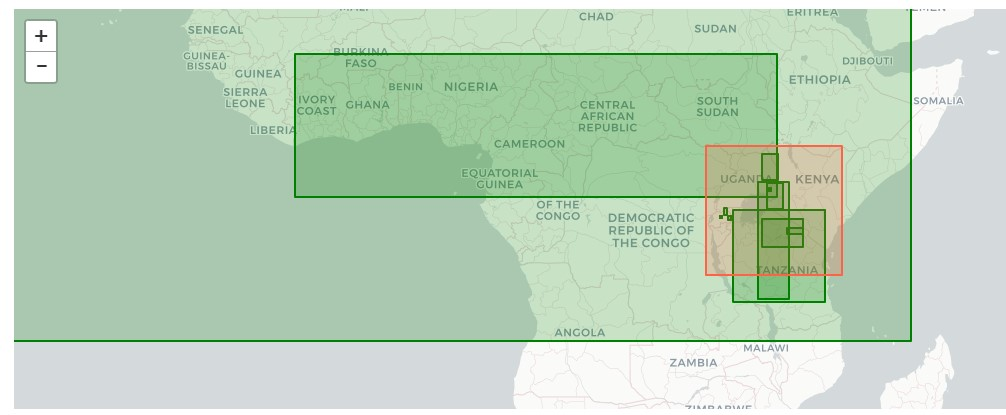

In [16]:
from IPython.display import Image
Image(filename='searchImage.jpg') 

# 5. Search for Feature Items with Bounding Box, Land Cover Types, Crop Types, Irrigation Types and Validity Time

In [32]:
itemSearchCollectionId=cols[0]['collectionId']
colbbox = cols[0]['extent']['spatial']['bbox'][0]
itembbox = [[colbbox[1],colbbox[0]],[colbbox[3],colbbox[2]]]
bbox='&Bbox=28.696289&Bbox=-6.926427&Bbox=40.605469&Bbox=4.434044' #bbox: minimum longitude, minimum latitude, maximum longitude and maximum latitude 
valTime='ValidityTime.Start=2019-01-01T00%3A00%3A00Z&ValidityTime.End=2021-12-30T00%3A00%3A00Z' # date time in yyyy-MM-ddTHH:mm:ssZ format with url escaped
ewocCodes='&EwocTypes=1201020020&EwocTypes=1101080000&EwocTypes=1201000000&EwocTypes=1107000040&EwocTypes=1103030000&EwocTypes=1103110070&EwocTypes=1201030040&EwocTypes=1105010010&EwocTypes=1103010010&EwocTypes=4300000000&EwocTypes=7000000000&EwocTypes=1101060000&EwocTypes=1103060000&EwocTypes=1103020050&EwocTypes=1106000020&EwocTypes=1000000000&EwocTypes=1201010000&EwocTypes=1103090040&EwocTypes=1103000000&EwocTypes=1300000000&EwocTypes=1101070030&EwocTypes=1111010100&EwocTypes=1107000020&EwocTypes=2000000000&EwocTypes=1107000010&EwocTypes=1103010020'
# wheat, winter wheat and spring wheat
irrTypes='&IrrigationTypes=0'
# crop confidence of 60 to 99
cropConfidence='&CropTypeConfidence.Start=60&CropTypeConfidence.End=99'

itemSearchUrl = f'{apiUrl}/collections/{itemSearchCollectionId}/items?SkipCount=0&MaxResultCount=1000&{bbox}&?{valTime}{ewocCodes}{irrTypes}'

print(cols[0]['collectionId'])
print(itembbox)
print(itemSearchUrl)

#'https://ewoc-rdm-api.iiasa.ac.at/collections/2017ugaradiantearth01poly110/items?MaxResultCount=1000&&Bbox=28.696289&Bbox=-6.926427&Bbox=40.605469&Bbox=4.434044&?ValidityTime.Start=2019-01-01T00%3A00%3A00Z&ValidityTime.End=2021-12-30T00%3A00%3A00Z&CropTypes=1201020020&CropTypes=1101080000&CropTypes=1201000000&CropTypes=1107000040&CropTypes=1103030000&CropTypes=1103110070&CropTypes=1201030040&CropTypes=1105010010&CropTypes=1103010010&CropTypes=4300000000&CropTypes=7000000000&CropTypes=1101060000&CropTypes=1103060000&CropTypes=1103020050&CropTypes=1106000020&CropTypes=1000000000&CropTypes=1201010000&CropTypes=1103090040&CropTypes=1103000000&CropTypes=1300000000&CropTypes=1101070030&CropTypes=1111010100&CropTypes=1107000020&CropTypes=2000000000&CropTypes=1107000010&CropTypes=1103010020&irrTypes=0'
itemSearchResponse = requests.get(itemSearchUrl)
itemSearchResponse.json()


2019afnhicropharvestpoly100
[[-0.062508704213765, -7.505459141380701], [12.41620026942137, 34.88243885389093]]
https://ewoc-rdm-api.iiasa.ac.at/collections/2019afnhicropharvestpoly100/items?SkipCount=0&MaxResultCount=1000&&Bbox=28.696289&Bbox=-6.926427&Bbox=40.605469&Bbox=4.434044&?ValidityTime.Start=2019-01-01T00%3A00%3A00Z&ValidityTime.End=2021-12-30T00%3A00%3A00Z&EwocTypes=1201020020&EwocTypes=1101080000&EwocTypes=1201000000&EwocTypes=1107000040&EwocTypes=1103030000&EwocTypes=1103110070&EwocTypes=1201030040&EwocTypes=1105010010&EwocTypes=1103010010&EwocTypes=4300000000&EwocTypes=7000000000&EwocTypes=1101060000&EwocTypes=1103060000&EwocTypes=1103020050&EwocTypes=1106000020&EwocTypes=1000000000&EwocTypes=1201010000&EwocTypes=1103090040&EwocTypes=1103000000&EwocTypes=1300000000&EwocTypes=1101070030&EwocTypes=1111010100&EwocTypes=1107000020&EwocTypes=2000000000&EwocTypes=1107000010&EwocTypes=1103010020&IrrigationTypes=0


{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[34.488480320154544, 0.878556854548685],
      [34.48848028435861, 0.878466412359454],
      [34.48839043692033, 0.878466448389402],
      [34.48839032956112, 0.878195121810308],
      [34.488300482125624, 0.878195157826954],
      [34.48830041057556, 0.878014273433245],
      [34.4882105631407, 0.878014309440299],
      [34.488210455849725, 0.877742982838266],
      [34.48812060841765, 0.877743018832021],
      [34.48812050116632, 0.877471692218451],
      [34.48803065373703, 0.877471728198907],
      [34.48803054652534, 0.877200401573802],
      [34.48794069909882, 0.877200437540961],
      [34.48794059192676, 0.876929110904321],
      [34.487850744503035, 0.876929146858184],
      [34.48785063737061, 0.87665782021001],
      [34.487760789949654, 0.876657856150579],
      [34.48776071855077, 0.87647697171082],
      [34.48767087113045, 0.876477007641804],
      [34.

## Display Result on Map. 
The APIs are page based, the skip and max count needs to be used to get all the results page wise

In [33]:
from ipywidgets import Text, HTML
center=[0.08,36.54]
zoom=6
m=Map(basemap=basemaps.CartoDB.Positron, center=center, zoom=zoom,close_popup_on_click=False)

aoi = Rectangle(bounds=itembbox, color="green", weight=2) 

data = itemSearchResponse.json()
layer= GeoJSON(
    data=data,
    style={
        'opacity': 1, 'fillOpacity': 0.5, 'weight': 2
    },
    hover_style={
        'color': 'white', 'dashArray': '0', 'fillOpacity': 0.5
    },
    point_style={'radius': 5, 'color': 'red', 'fillOpacity': 0.8, 'fillColor': 'blue', 'weight': 3},
    style_callback=random_color
)


#add layers
m.add_layer(aoi)
m.add_layer(layer)

# display map
m




Map(center=[0.08, 36.54], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoom_in_text…

Below Image is sample output only.

# 6. Get Metadata of Collection

In [35]:
colId = cols[0]['collectionId']
metadataUrl = f'{apiUrl}/collections/{colId}/metadata/items'
metadata = requests.get(metadataUrl)
metadata.json()[0:5]

[{'id': 37,
  'name': 'SampleDownloadUrl',
  'value': 'https://ewocstorage.blob.core.windows.net/public/2019afnhicropharvestpoly100/sample_2019afnhicropharvestpoly100.geoparquet',
  'type': 'text'},
 {'id': 125,
  'name': 'CuratedDataSet:ReferenceCuratedDataSet:NameCuratedDataSet:',
  'value': '2019afnhicropharvestpoly100',
  'type': 'text'},
 {'id': 126,
  'name': 'CuratedDataSet::TitleCuratedDataSet:',
  'value': 'Rapid response crop maps Kenya, Mali and Togo (2019) by NASA Harvest',
  'type': 'text'},
 {'id': 127,
  'name': 'CuratedDataSet:ObservationCuratedDataset:Geometry:PointOrPolygonOrRaster',
  'value': 'Polygon',
  'type': 'text'},
 {'id': 128,
  'name': 'CuratedDataSet:ObservationCuratedDataset::NoOfObservations',
  'value': '3846',
  'type': 'text'}]

Get Excel

<Response [200]>
2019afnhicropharvestpoly100_metadata.xlsx saved to local path


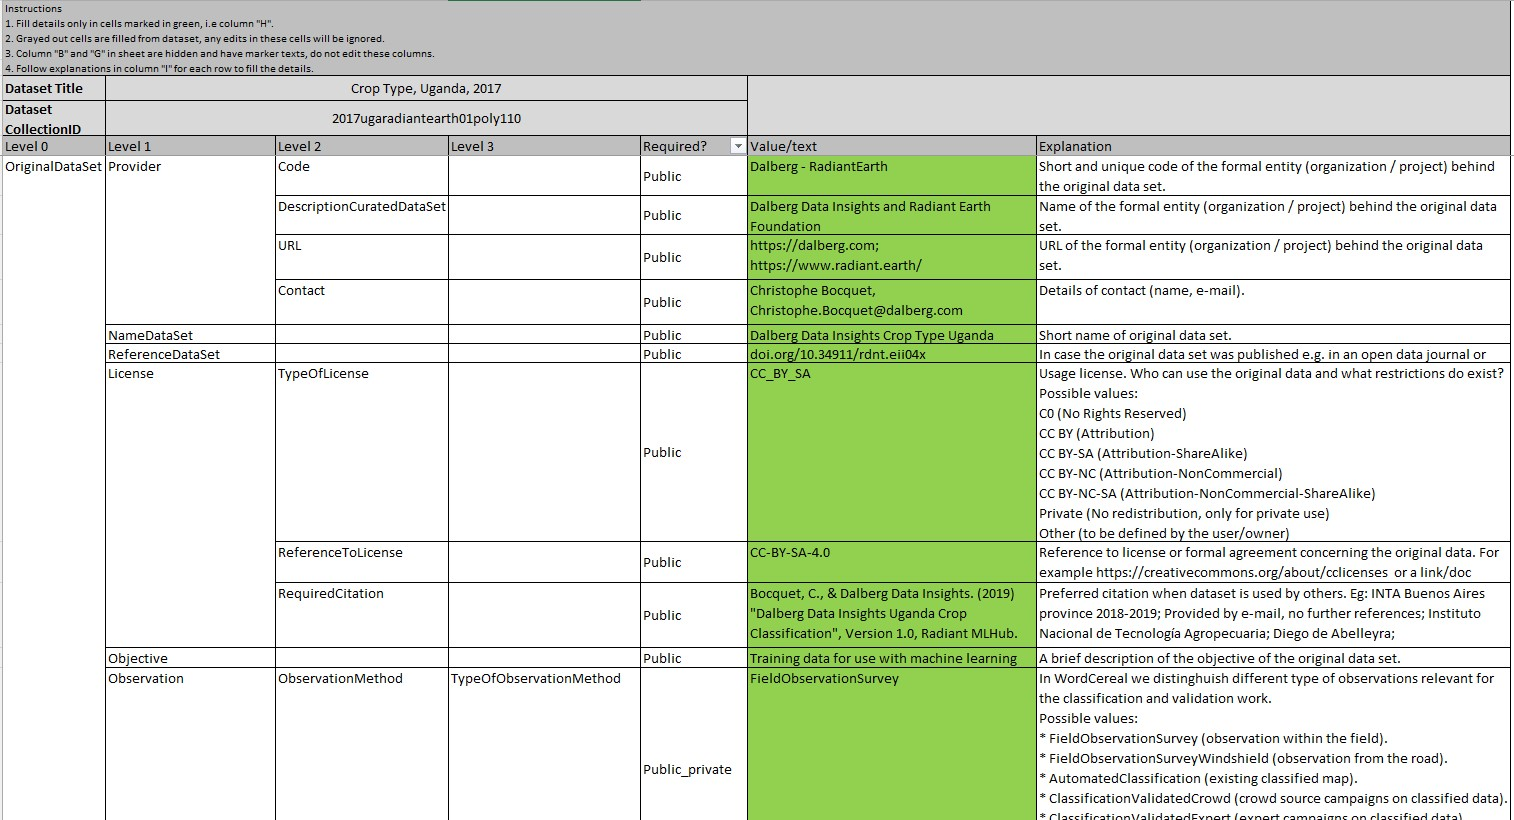

In [36]:
excelUrl = f'{apiUrl}/collections/{colId}/metadata/download'
response = requests.get(excelUrl)
print(response)
fileName=f"{colId}_metadata.xlsx"
open(fileName, "wb").write(response.content)
print(f"{fileName} saved to local path")
# Sample Excel Output
Image(filename='meta.jpg') 
